# Data Mining and Statistics
## Session 7 - Recommendation
*Peter Stikker - Haarlem, the Netherlands*

----

## 7.1. Example data

We'll be using the movielens data, the 5MB version. To load this into Python we'll need pandas:

In [1]:
import pandas as pd

Now we can use 'read_csv' to load the ratings. These are in the u.data file, and have a 'tab' delimiter, so we can use 'sep='\t'':

In [2]:
df = pd.read_csv('data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

Lets take a quick look:

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


The 'item_id' is actually the movie itself. The full name can be found in the 'u.item' file. This is using a delimiter of '|' and has an encoding of 'latin-1':

In [4]:
movie_titles = pd.read_csv('data/u.item', sep='|', encoding='latin-1', header=None)
movie_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


I'll only need the item_id and the title itself so lets store those in a separate dataframe:

In [5]:
dfMovieNames = pd.DataFrame(movie_titles[0])
dfMovieNames.columns=['item_id']
dfMovieNames['MovieName'] = movie_titles[1]
dfMovieNames.head()

,item_id,MovieName
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


And now merge the two dataframes we have:

In [6]:
df2 = pd.merge(df, dfMovieNames, on='item_id')
df2.head()

,user_id,item_id,rating,timestamp,MovieName
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## 7.2. Building an Item-Based Recommendation

Each row is the user rating of one particular movie. It will be easier if we have an overview where each row is a unique user, and as fields the different ratings that user gave for each movie.

This can be done using a pivottable:

In [7]:
movie_matrix = df2.pivot_table(index='user_id', columns='MovieName', values='rating')
movie_matrix.head()

MovieName,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


We can use this movie_matrix to calculate the (Pearson) correlation coefficient between any two movies.

Let's say we are interested in someone who rated 'Air Force One (1997)' with a high rating. Which movies have a strong positive correlation in their ratings with those of 'Air Force One'? Since this would indicate that users who rate that movie high, usually also rate Air Force One high, so we could then recommend this to that person.

To calculate all the correlations between one field, and all other fields we can use 'corrwith'.

First select the movie:

In [8]:
myMovie = movie_matrix['Air Force One (1997)']

Now for the correlations, sorted of course to make life easy:

In [9]:
myCorrs = movie_matrix.corrwith(myMovie).sort_values(ascending=False)

# and as a dataframe
corrDf = pd.DataFrame(myCorrs, columns=['Correlation'])
corrDf.dropna(inplace=True)
corrDf = corrDf.sort_values('Correlation', ascending=False)
corrDf.head()

c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
MovieName,
Men of Means (1998),1.0
All Dogs Go to Heaven 2 (1996),1.0
Phat Beach (1996),1.0
Love and Death on Long Island (1997),1.0
My Crazy Life (Mi vida loca) (1993),1.0


A few weird things. 

First the warning. It mentions '*Degrees of freedom <= 0 for slice c = cov(x, y, rowvar, dtype=dtype)*'. This is caused if we don't have at least two rating from each movie. Luckily it is just a warning so we don't need to worry about it too much.

Second is that the correlation between Air Force One and Air Force One is a perfect 1 (unrounded), but it is not listed on top. 

Third, some others have a perfect correlation. My guess is that those have rounding errors or perhaps very few ratings which just happened to be the same.

The number of ratings itself might actually also be helpful. Perhaps we should only take into consideration movies of which we have a decent number of ratings. Let's add the number of ratings.

In [10]:
ratings = pd.DataFrame(df2.groupby('MovieName')['rating'].mean())
ratings['nRatings'] = df2.groupby('MovieName')['rating'].count()
ratings.sort_values(by=['nRatings']).head()

,rating,nRatings
MovieName,,
Á köldum klaka (Cold Fever) (1994),3.0,1
Mille bolle blu (1993),1.0,1
Mat' i syn (1997),1.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Man from Down Under, The (1943)",1.0,1


Lets add the number of ratings to the correlations data frame:

In [11]:
corrDf = corrDf.merge(ratings['nRatings'], on='MovieName')
corrDf.head()

,Correlation,nRatings
MovieName,,
Men of Means (1998),1.0,2
All Dogs Go to Heaven 2 (1996),1.0,15
Phat Beach (1996),1.0,5
Love and Death on Long Island (1997),1.0,2
My Crazy Life (Mi vida loca) (1993),1.0,11


To find a minimum number of ratings that is suitable for our data, lets create a histogram of the number of ratings:

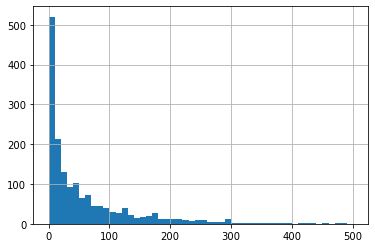

In [12]:
ratings['nRatings'].hist(bins=50, range=(0,500));

It is up to you to decide on a threshold, but I'll use 75.

Lets filter out the movies with less than 75 ratings:

In [13]:
corrDf[corrDf['nRatings']>=75].head()

,Correlation,nRatings
MovieName,,
Air Force One (1997),1.000000,431
Copycat (1995),0.711744,86
"Hunt for Red October, The (1990)",0.554383,227
"Jackal, The (1997)",0.539649,87
"Firm, The (1993)",0.526743,151


So, final recommendation for someone who was happy with 'Air Force One' is to go and watch 'Copycat'.

Class work


In [16]:
#see what recommendation you get on movie you liked.
myMovie = movie_matrix['Muppet Treasure Island (1996)']


#create a function(method) recommend, that takes a movie name as input and returns a recommendation.
myCorrs = movie_matrix.corrwith(myMovie).sort_values(ascending=False)

# and as a dataframe
corrDf = pd.DataFrame(myCorrs, columns=['Correlation'])
corrDf.dropna(inplace=True)
corrDf = corrDf.sort_values('Correlation', ascending=False)
corrDf.head()


c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
MovieName,
Muppet Treasure Island (1996),1.0
Touch (1997),1.0
Amateur (1994),1.0
Fled (1996),1.0
Telling Lies in America (1997),1.0


In [17]:

ratings = pd.DataFrame(df2.groupby('MovieName')['rating'].mean())
ratings['nRatings'] = df2.groupby('MovieName')['rating'].count()
ratings.sort_values(by=['nRatings']).head()


,rating,nRatings
MovieName,,
Á köldum klaka (Cold Fever) (1994),3.0,1
Mille bolle blu (1993),1.0,1
Mat' i syn (1997),1.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Man from Down Under, The (1943)",1.0,1


In [18]:
corrDf = corrDf.merge(ratings['nRatings'], on='MovieName')
corrDf.head()

,Correlation,nRatings
MovieName,,
Muppet Treasure Island (1996),1.0,84
Touch (1997),1.0,9
Amateur (1994),1.0,18
Fled (1996),1.0,34
Telling Lies in America (1997),1.0,13


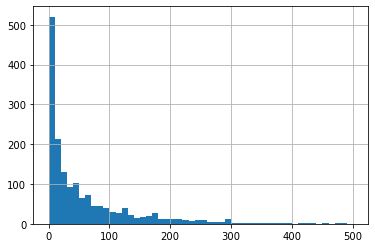

In [19]:
ratings['nRatings'].hist(bins=50, range=(0,500));

In [20]:
corrDf[corrDf['nRatings']>=75].head()

,Correlation,nRatings
MovieName,,
Muppet Treasure Island (1996),1.000000,84
Lost Highway (1997),0.894792,125
Chain Reaction (1996),0.681859,80
"Room with a View, A (1986)",0.658474,134
Demolition Man (1993),0.626399,92


In [21]:
def recommend (name_Movie, movie_matrix, min_rating):
    #create a function(method) recommend, that takes a movie name as input and returns a recommendation.
    myCorrs = movie_matrix.corrwith(myMovie).sort_values(ascending=False)

    # and as a dataframe
    corrDf = pd.DataFrame(myCorrs, columns=['Correlation'])
    corrDf.dropna(inplace=True)
    corrDf = corrDf.sort_values('Correlation', ascending=False)
    # corrDf.head()
    ratings = pd.DataFrame(df2.groupby('MovieName')['rating'].mean())
    ratings['nRatings'] = df2.groupby('MovieName')['rating'].count()
    # ratings.sort_values(by=['nRatings']).head()
    
    corrDf = corrDf.merge(ratings['nRatings'], on='MovieName')
    # corrDf.head()
    corrDf[corrDf['nRatings']>=min_rating].head()



recommend('Muppet Treasure Island (1996)', movie_matrix ,75)

c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\steph\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
